## Linear Regression from Scratch

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [96]:
# Read the dataset using read_csv
df = pd.read_csv('flight_price_prediction.csv')
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [3]:
# Removing unecessary cols resulting in outliers
df['source_destination'] = df['source_city'] + '-' + df['destination_city']
df.drop(['Unnamed: 0', 'flight', 'source_city', 'destination_city'], axis=1, inplace=True)
df = df.dropna()

In [4]:
df.head(10)

,airline,departure_time,stops,arrival_time,class,duration,days_left,price,source_destination
0,SpiceJet,Evening,zero,Night,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,Early_Morning,zero,Morning,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,Morning,zero,Afternoon,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,Morning,zero,Morning,Economy,2.33,1,5955,Delhi-Mumbai
5,Vistara,Morning,zero,Afternoon,Economy,2.33,1,5955,Delhi-Mumbai
6,Vistara,Morning,zero,Morning,Economy,2.08,1,6060,Delhi-Mumbai
7,Vistara,Afternoon,zero,Evening,Economy,2.17,1,6060,Delhi-Mumbai
8,GO_FIRST,Early_Morning,zero,Morning,Economy,2.17,1,5954,Delhi-Mumbai
9,GO_FIRST,Afternoon,zero,Evening,Economy,2.25,1,5954,Delhi-Mumbai


In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   airline             300153 non-null  object 
 1   departure_time      300153 non-null  object 
 2   stops               300153 non-null  object 
 3   arrival_time        300153 non-null  object 
 4   class               300153 non-null  object 
 5   duration            300153 non-null  float64
 6   days_left           300153 non-null  int64  
 7   price               300153 non-null  int64  
 8   source_destination  300153 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 20.6+ MB


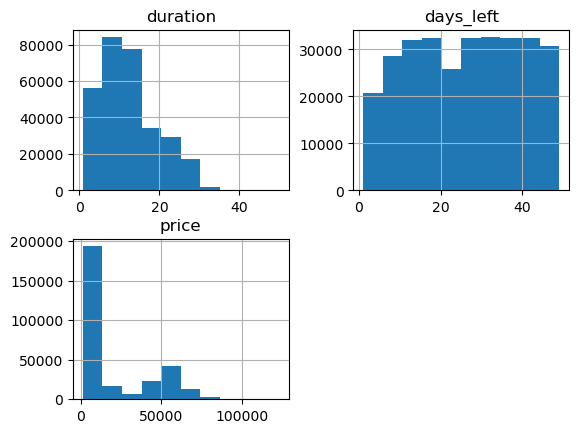

In [7]:
# Plotting the histogram
df.hist()
plt.show()

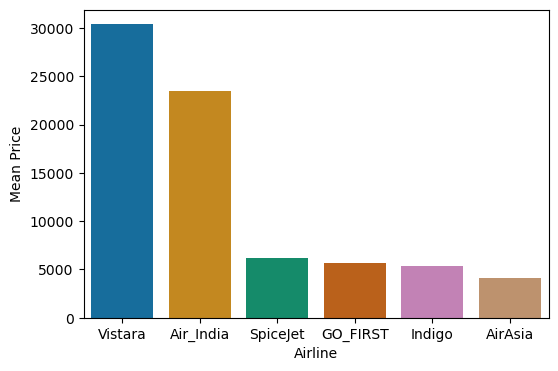

In [8]:
# Bar graph to visualise the average price per airline
plt.figure(figsize = (6,4))

mean_price_by_airline = df.groupby('airline')['price'].mean().reset_index().sort_values(by='price', ascending=False)
sns.barplot(x='airline', y='price', palette='colorblind', data=mean_price_by_airline)

plt.xlabel('Airline')
plt.ylabel("Mean Price")
plt.show()

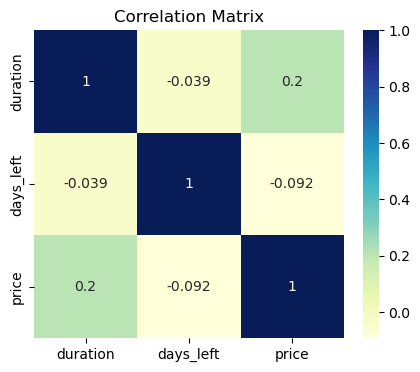

In [9]:
# Plot heatmap to find correlation between data in the flight dataset
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

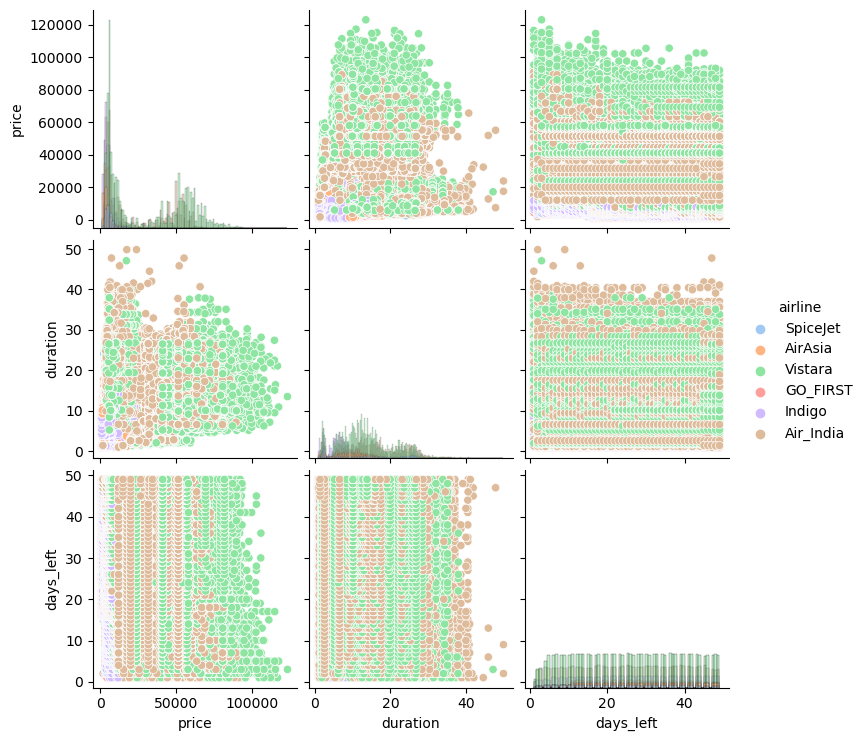

In [10]:
# Plotting paired scatterplot to visualise relationship between listed data
sns.pairplot(df, vars=['price', 'duration', 'days_left'], hue='airline', diag_kind='hist', palette='pastel')
plt.show()

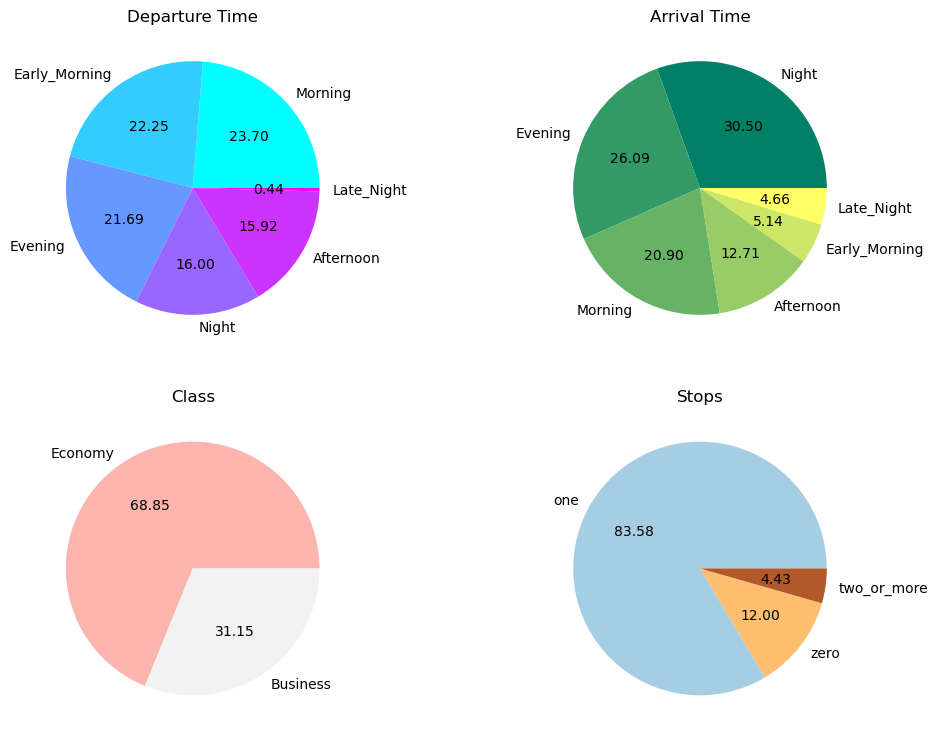

In [11]:
# PLotting different pie charts for insights on counts of departure time, arrival time, class and stops
plt.figure(figsize=(12, 14))

plt.subplot(3, 2, 1)
df["departure_time"].value_counts().plot(kind = "pie", autopct = "%.2f", cmap = 'cool')
plt.title('Departure Time')
plt.ylabel('')

plt.subplot(3, 2, 2)
df['arrival_time'].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = 'summer')
plt.title('Arrival Time')
plt.ylabel('')

plt.subplot(3, 2, 3)
df['class'].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = 'Pastel1')
plt.title('Class')
plt.ylabel('')

plt.subplot(3, 2, 4)
df['stops'].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = 'Paired')
plt.title('Stops')
plt.ylabel('')

plt.show()

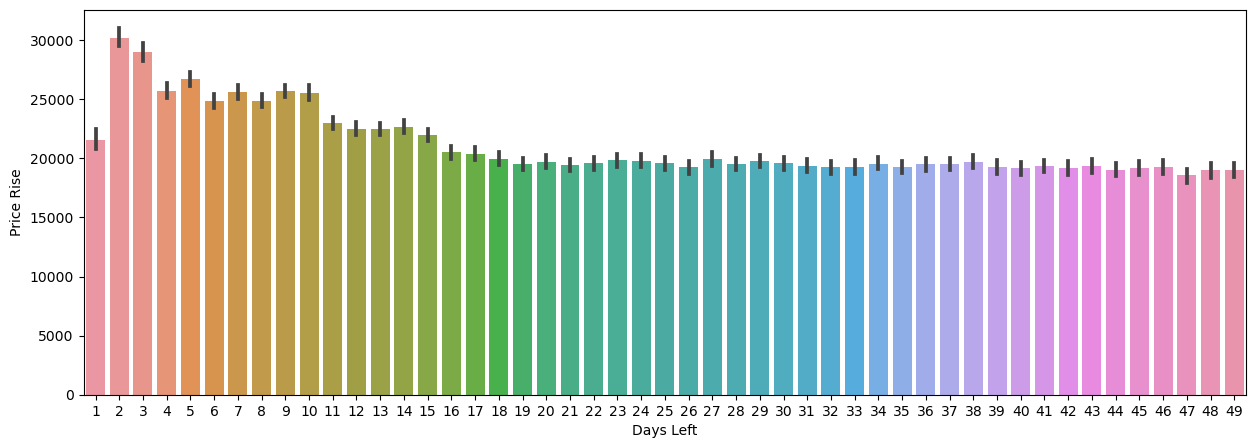

In [12]:
# Plot bargraph of the price hike per days left for the flight
plt.figure(figsize = (15,5))
sns.barplot(x= 'days_left', y = 'price', data = df)
plt.xlabel('Days Left')
plt.ylabel("Price Rise")
plt.show()

In [13]:
# Checking for categorial cols
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

# Converting features with string data type to categorical
time_cat = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']

df['departure_time'].replace(time_cat, [0,1,2,3,4,5], inplace=True)
df['arrival_time'].replace(time_cat, [0,1,2,3,4,5], inplace=True)
df['stops'].replace(['zero', 'one', 'two_or_more'], [0,1,2], inplace=True)
df['class'].replace(['Economy', 'Business'], [0,1], inplace=True)

df['airline'] = pd.Categorical(df['airline']).codes.astype('int64')
df['source_destination'] = pd.Categorical(df['source_destination']).codes.astype('int64')

# Normalize non-categorical features
non_categorical_cols = ['duration', 'price', 'days_left']
for col in non_categorical_cols:
    col_min = df[col].min()
    col_max = df[col].max()
    df[col] = (df[col] - col_min) / (col_max - col_min)
    
# Checking the converted datatype
df.info()

['airline', 'departure_time', 'stops', 'arrival_time', 'class', 'source_destination']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   airline             300153 non-null  int64  
 1   departure_time      300153 non-null  int64  
 2   stops               300153 non-null  int64  
 3   arrival_time        300153 non-null  int64  
 4   class               300153 non-null  int64  
 5   duration            300153 non-null  float64
 6   days_left           300153 non-null  float64
 7   price               300153 non-null  float64
 8   source_destination  300153 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 20.6 MB


In [14]:
# Choosing column price as target variable Y 
X = df.drop(['price'], axis=1)
y = df['price']

In [15]:
# Dividing the dataset into 80% training and 20% testing.
combined_data_array = np.column_stack((X, y))
cal_idx = int(0.8 * len(combined_data_array))
training_data = combined_data_array[:cal_idx]
testing_data = combined_data_array[cal_idx:]

X_train, y_train = training_data[:, :-1], training_data[:, -1]
X_test, y_test = testing_data[:, :-1], testing_data[:, -1]

# Printing the shape
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (240122, 8)
y_train: (240122,)
X_test: (60031, 8)
y_test: (60031,)


In [16]:
# Defining Linear Regression
class LinearRegression:
    def __init__(self):
        self.X = X
        self.y = y
        
    def fit(self, X, y):
        x_transpose_x = np.dot(self.X.T, self.X)
        x_transpose_x_inv = np.linalg.inv(x_transpose_x)
        x_transpose_y = np.dot(self.X.T, self.y)
        wt = np.dot(x_transpose_x_inv, x_transpose_y)
        return wt
    
    def predict(self, X):
        weights = self.fit(X, self.y)
        y_pred = np.dot(X, weights)
        return y_pred
    
    def mse(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred)**2)
        return mse

In [17]:
model = LinearRegression()
wt = model.fit(X_train, y_train)
mse = model.mse(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Weights:\n {wt}\n\nMean Square Error: {mse:.6f}')

Weights:
 [ 7.37791458e-03 -9.51919939e-04  4.56736575e-02  1.57653420e-03
  3.69167230e-01  3.25750396e-02 -5.44745095e-02  6.52413815e-05]

Mean Square Error: 0.001998


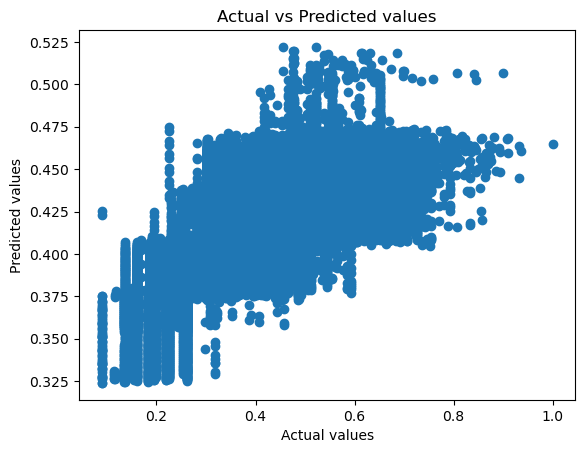

In [18]:
# Plot the predictions vs the actual targets.
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

In [77]:
linear_results = {
    'model': 'Linear Regression',
    'weights': wt,
    'loss': mse
}
with open("linear_results.pickle", "wb") as f:
    pickle.dump(linear_results, f)

## Ridge Regression Implementation

In [93]:
class RidgeRegression:
    def __init__(self, alpha):
        self.alpha = alpha
        self.wt = None
        
    def fit(self, X, y):
        xTx = np.dot(X.T, X)
        xI_inv = np.linalg.inv(xTx + self.alpha * np.eye(xTx.shape[0]))
        xt_y = np.dot(X.T, y)
        wt = np.dot(xI_inv, xt_y)
        self.wt=wt
        return wt
        
    def predict(self, X):
        y_pred = np.dot(X, self.wt)
        return y_pred
    
    def squared_loss(self, X, y):
        y_pred = self.predict(X)
        diff = y - y_pred
        loss = np.mean(diff**2) + (self.alpha * np.sum(self.wt ** 2))
        return loss

In [94]:
model = RidgeRegression(0.1)
wt = model.fit(X_train, y_train)
loss = model.squared_loss(X_train, y_train)
y_predicted = model.predict(X_test)
print(f'\nSquared Loss: {loss:.6f}')


Squared Loss: 0.015011


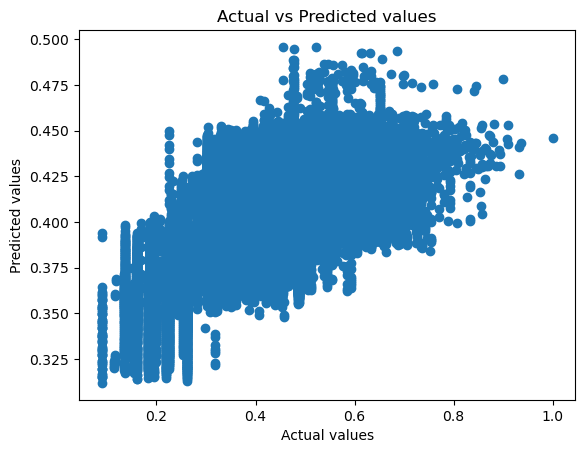

In [81]:
# Plot the predictions vs the actual targets.
plt.scatter(y_test, y_predicted)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

In [82]:
ridge_results = {
    'model': 'Ridge Regression',
    'weights': wt,
    'loss': loss
}
with open("ridge_results.pickle", "wb") as f:
    pickle.dump(ridge_results, f)